Text(0, 0.5, 'Amplitude')

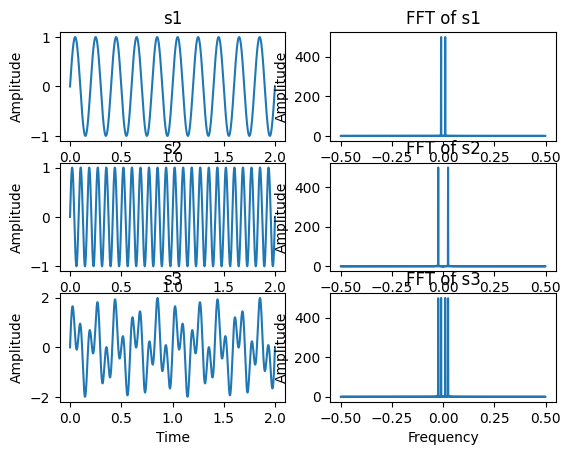

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given signals
t = np.linspace(0, 2, 1000)  
f1=5
s1=np.sin(2*np.pi*f1*t)   

f2=12  
s2=np.sin(2*np.pi*f2*t)
s3=s1 + s2

# Calculate FFT of signals
fft_s1 = np.fft.fft(s1)
fft_s2 = np.fft.fft(s2)
fft_s3 = np.fft.fft(s3)

# Frequency bins
freq = np.fft.fftfreq(len(s1))

#plot s
plt.subplot(321)
plt.plot(t,s1)
plt.title('s1')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(323)
plt.plot(t,s2)
plt.title('s2')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(325)
plt.plot(t,s3)
plt.title('s3')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot FFT of s1
plt.subplot(322)
plt.plot(freq, np.abs(fft_s1))
plt.title('FFT of s1')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

# Plot FFT of s2
plt.subplot(324)
plt.plot(freq, np.abs(fft_s2))
plt.title('FFT of s2')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

# Plot FFT of s3
plt.subplot(326)
plt.plot(freq, np.abs(fft_s3))
plt.title('FFT of s3')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


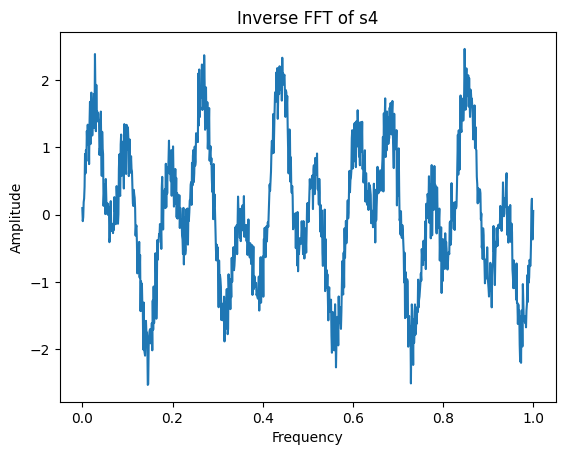

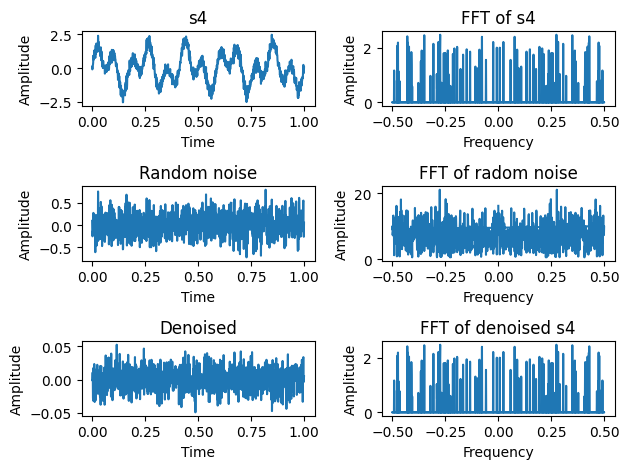

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given signal with noise
t = np.linspace(0, 1, 1000)  
f1=5
s1=np.sin(2*np.pi*f1*t)   

f2=12
s2=np.sin(2*np.pi*f2*t)
s3=s1+s2 
rand_n=np.random.normal(0, .25, 1000)
s4 = s3 + rand_n 

# Compute FFT of s4
fft_s4 = np.fft.fft(s4)
#print(np.max(np.abs(fft_s4)))
threshold = 0.005*np.max(np.abs(fft_s4))
#threshold=7
freq = np.fft.fftfreq(len(s4))
inv_fft_s4 = np.fft.ifft(fft_s4)
plt.figure(1)
plt.plot(t, inv_fft_s4)
plt.title('Inverse FFT of s4')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')


# Identify noise components (e.g., frequencies above a threshold)
noise_indices = np.where(np.abs(fft_s4) > threshold)
#print(noise_indices)

# Set noise components to zero in the FFT
fft_s4[noise_indices] = 0
#print(fft_s4)
# Inverse transform the modified FFT to obtain the denoised signal
denoised_s4 = np.fft.ifft(fft_s4)
#print(denoised_s4)
#plot s
plt.figure(2)
plt.subplot(321)
plt.plot(t,s4)
plt.title('s4')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(323)
plt.plot(t,rand_n)
plt.title('Random noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(325)
plt.plot(t,denoised_s4)
plt.title('Denoised')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(322)
plt.plot(freq, np.abs(fft_s4))
plt.title('FFT of s4')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(324)
plt.plot(freq, np.abs(np.fft.fft(rand_n)))
plt.title('FFT of radom noise')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(326)
plt.plot(freq, np.abs(np.fft.fft(denoised_s4)))
plt.title('FFT of denoised s4')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Amplitude')

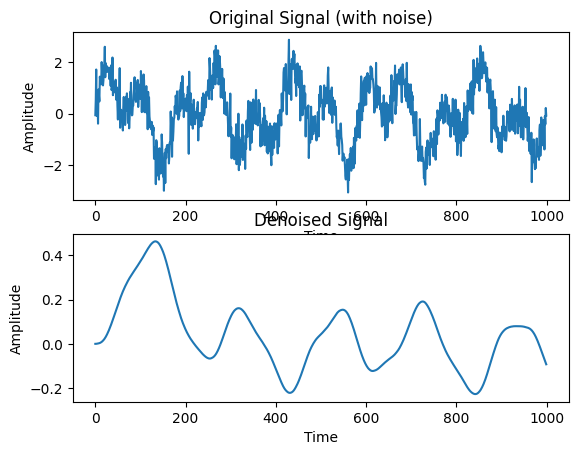

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Given signal with noise
t = np.linspace(0, 1, 1000)  
f1=5
s1=np.sin(2*np.pi*f1*t)   

f2=12  
s2=np.sin(2*np.pi*f2*t)
s3=s1+s2 
s4 = s3 + np.random.normal(0, 0.5, 1000)  # Example noisy signal

# Define Butterworth filter parameters
order = 2
cutoff_freq = 2  # Adjust the cutoff frequency as desired (between 0 and 1)

# Normalize cutoff frequency
nyquist_freq = 0.5*1000  # Nyquist frequency is half of the sampling rate
normalized_cutoff = cutoff_freq / nyquist_freq

# Design Butterworth filter
b, a = butter(order, normalized_cutoff, btype='low', analog=False, output='ba')

# Apply the filter to the noisy signal
denoised_s4 = lfilter(b, a, s4)

# Plotting the original signal and denoised signal
plt.subplot(211)
plt.plot(s4)
plt.title('Original Signal (with noise)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.plot(denoised_s4)
plt.title('Denoised Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')